In [1]:
import os
import numpy as np
import pathlib

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

from tensorflow.keras.preprocessing import image



import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
random_seed = 42
keras.utils.set_random_seed(random_seed)

In [3]:
val_folder_path = '/kaggle/input/foodx-251/val_set_diviso/val_set_diviso'

# modello EfficientNetB0 
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# feature extraction set di validazione (train)
all_features = []
all_labels = []

for class_name in os.listdir(val_folder_path):
    class_path = os.path.join(val_folder_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            

            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            features = base_model.predict(img_array).flatten()

            all_features.append(features)
            all_labels.append(class_name)

In [ ]:
all_features = np.array(all_features)
all_labels = np.array(all_labels)

In [4]:
# Caricamento features per non rieseguire tutte le volte
#all_features = np.load('/kaggle/input/features-estratte-valset/features.npy')
#all_features = np.array(all_features)
#all_labels = np.load('/kaggle/input/features-estratte-valset/labels.npy')
#all_labels = np.array(all_labels)

In [5]:
# immagini estratte = test
test_folder_path = '/kaggle/input/foodx-251/extracted_images-20240107T103358Z-001/extracted_images'

test_features = []
for filename in os.listdir(test_folder_path):
    img_path = os.path.join(test_folder_path, filename)
    
    # Carica e pre-processa l'immagine
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Estrai le feature utilizzando EfficientNet
    features = base_model.predict(img_array).flatten()
    
    test_features.append(features)

test_features = np.array(test_features)

1/1 [==============================] - 0s 91ms/step


**Distanza euclidea e PCA**

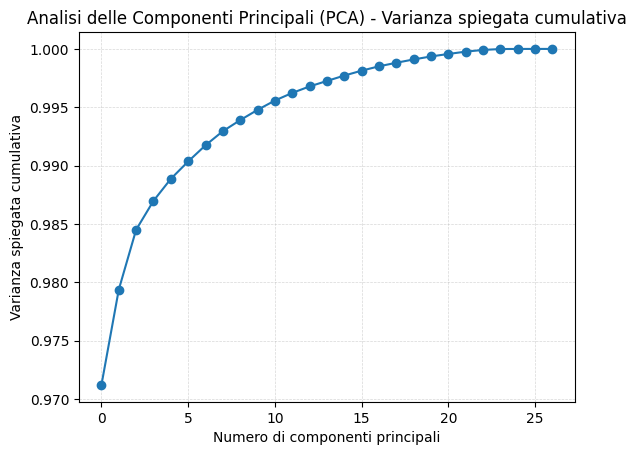

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA


# Calcola la distanza euclidea tra le features di test e quelle di addestramento
distances = euclidean_distances(test_features, all_features)

# Applicazione PCA alle distanze
pca = PCA()
pca.fit(distances)


explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Analisi delle Componenti Principali (PCA) - Varianza spiegata cumulativa')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5, axis='both')  # Aggiunge griglie con parametri personalizzati
plt.show()

In [36]:
num_components = 23  
pca_features = pca.transform(distances)[:, :num_components]
soglia_pca = np.max(np.linalg.norm(pca_features, axis=1)) / 2.0  

indici_cibo_pca = np.where(np.linalg.norm(pca_features, axis=1) < soglia_pca)[0]
#print("Indici delle immagini di cibo utilizzando PCA:", indici_cibo_pca)
immagini_cibo = [os.listdir(test_folder_path)[indice] for indice in indici_cibo_pca]
print("Nomi dei file delle immagini di cibo:")
for immagine in immagini_cibo:
    print(immagine)


Indici delle immagini di cibo utilizzando PCA: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26]
Nomi dei file delle immagini di cibo:
immagine_2.png
immagine16_2.png
immagine17_1.png
immagine4_1.png
immagine18_1.png
immagine9_1.png
immagine19_1.png
immagine2_1.png
immagine20_1.png
immagine10_1.png
immagine_1.png
immagine14_1.png
immagine13_2.png
immagine9_2.png
immagine4_2.png
immagine20_2.png
immagine8_1.png
immagine5_2.png
immagine13_1.png
immagine5_1.png
immagine16_1.png
immagine12_1.png
immagine3_2.png
immagine11_1.png
immagine_3.png
